In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.duplicated().sum()

31994

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [8]:
df.fillna(0, inplace = True)

In [9]:
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [10]:
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


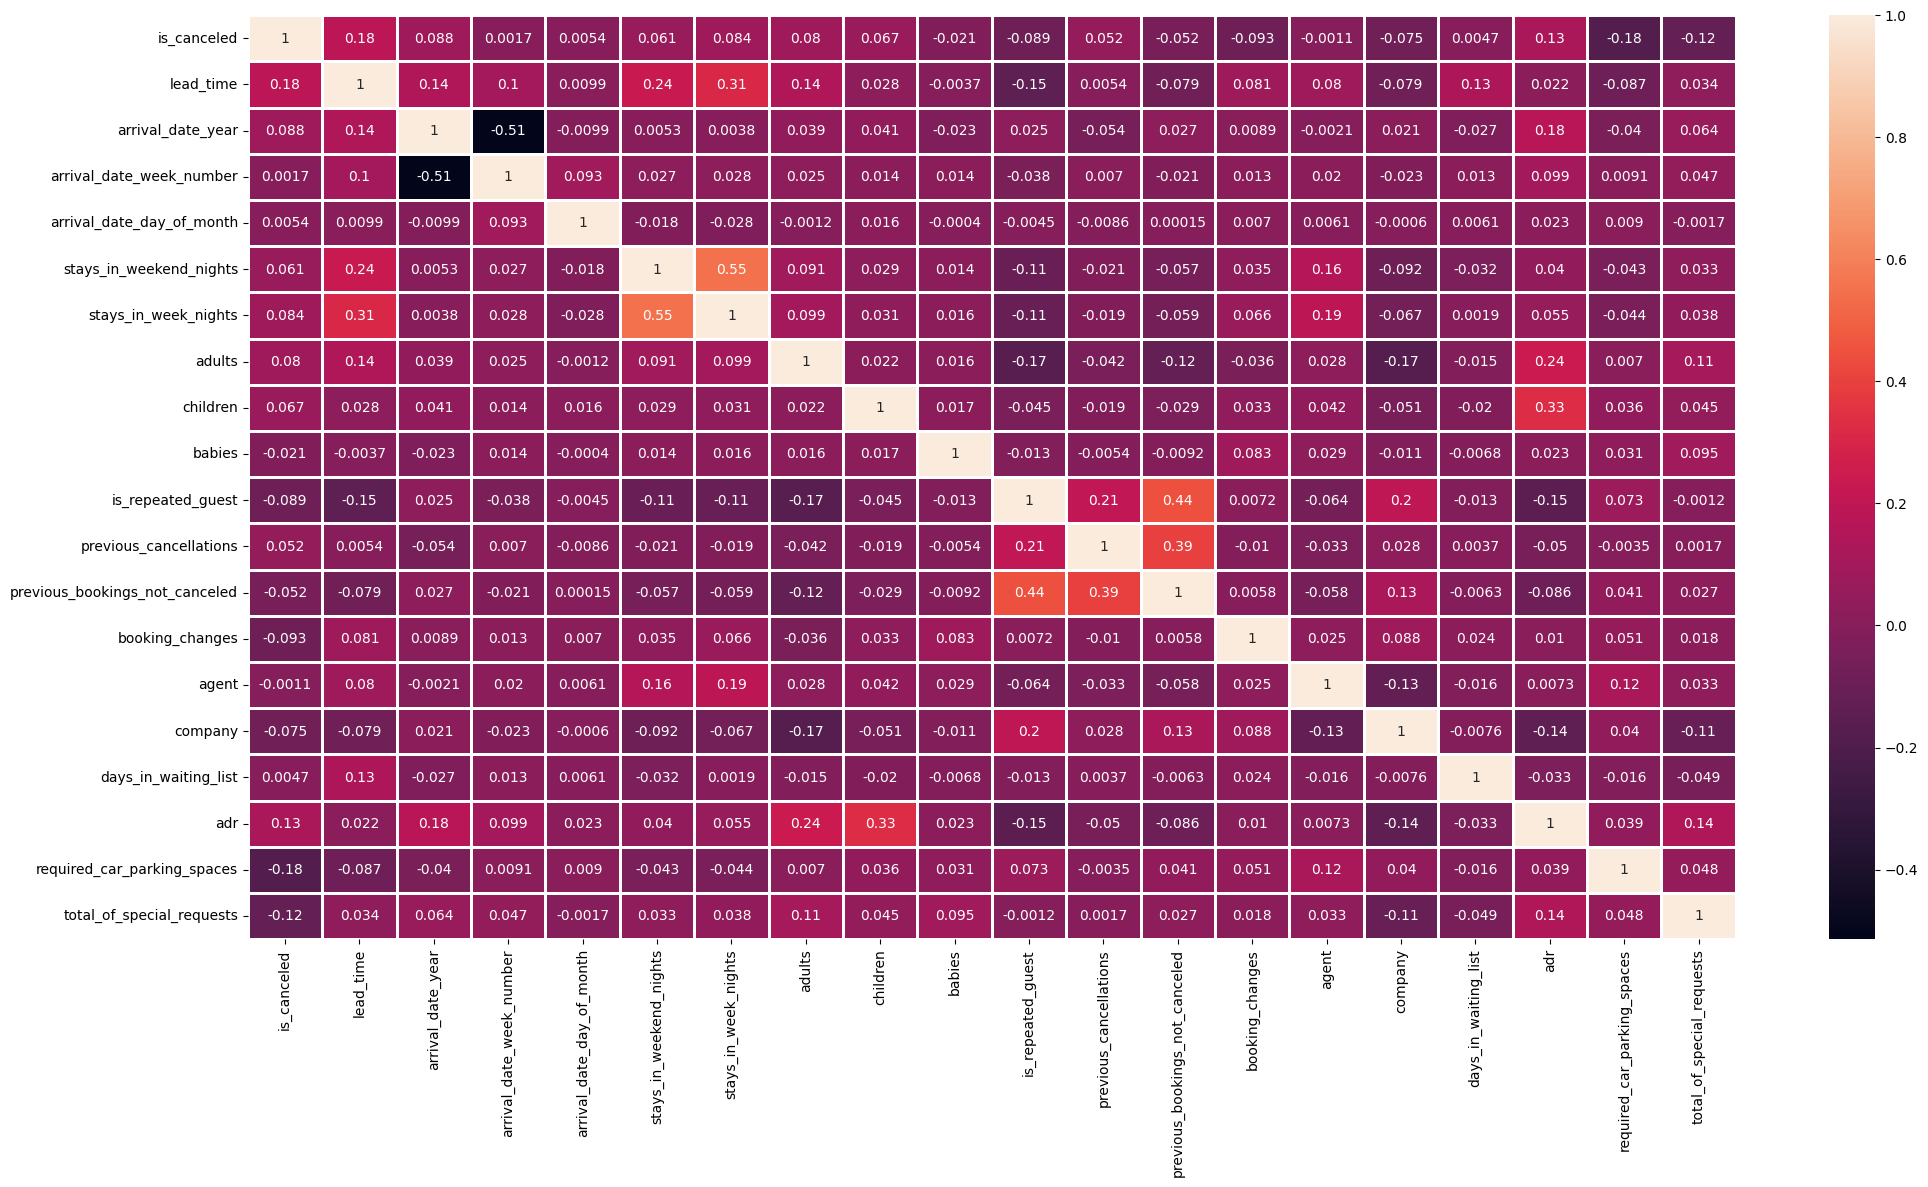

In [11]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [12]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.184515
required_car_parking_spaces       0.184456
adr                               0.127233
total_of_special_requests         0.120794
booking_changes                   0.093236
is_repeated_guest                 0.088764
arrival_date_year                 0.088020
stays_in_week_nights              0.084159
adults                            0.080271
company                           0.075314
children                          0.067182
stays_in_weekend_nights           0.060992
previous_bookings_not_canceled    0.052178
previous_cancellations            0.051501
babies                            0.020627
arrival_date_day_of_month         0.005449
days_in_waiting_list              0.004710
arrival_date_week_number          0.001691
agent                             0.001145
Name: is_canceled, dtype: float64

In [13]:
useless_col = ['days_in_waiting_list', 'arrival_date_day_of_month', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

df.drop(useless_col, axis = 1, inplace = True)

In [14]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,0,0,2,0.0,...,0,C,No Deposit,0.0,0.0,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,0,0,2,0.0,...,0,C,No Deposit,0.0,0.0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,0,1,1,0.0,...,0,A,No Deposit,0.0,0.0,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,2015,July,27,0,1,1,0.0,...,0,A,No Deposit,304.0,0.0,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,2015,July,27,0,2,2,0.0,...,0,A,No Deposit,240.0,0.0,Transient,98.0,0,1,2015-07-03


In [15]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [16]:
cat_df = df[cat_cols]
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [17]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])
cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [18]:
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [19]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [20]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [21]:
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [22]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,0,0,0,7,1
1,0,0,0,0,0,0,0,0,7,1
2,0,0,0,0,1,0,0,0,7,2
3,0,0,1,1,1,0,0,0,7,2
4,0,0,2,2,1,0,0,0,7,3


In [23]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,342,2015,27,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
1,737,2015,27,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
2,7,2015,27,0,1,1,0.0,0,0,0,0,0.0,0.0,75.00,0,0
3,13,2015,27,0,1,1,0.0,0,0,0,0,304.0,0.0,75.00,0,0
4,14,2015,27,0,2,2,0.0,0,0,0,0,240.0,0.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,2,5,2,0.0,0,0,0,0,394.0,0.0,96.14,0,0
119386,102,2017,35,2,5,3,0.0,0,0,0,0,9.0,0.0,225.43,0,2
119387,34,2017,35,2,5,2,0.0,0,0,0,0,9.0,0.0,157.71,0,4
119388,109,2017,35,2,5,2,0.0,0,0,0,0,89.0,0.0,104.40,0,0


In [24]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
deposit_type                      0
agent                             0
company                           0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date           0
dtype: int64

In [25]:
num_df.head()

,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,342,2015,27,0,0,2,0.0,0,0,0,0,0.0,0.0,0.0,0,0
1,737,2015,27,0,0,2,0.0,0,0,0,0,0.0,0.0,0.0,0,0
2,7,2015,27,0,1,1,0.0,0,0,0,0,0.0,0.0,75.0,0,0
3,13,2015,27,0,1,1,0.0,0,0,0,0,304.0,0.0,75.0,0,0
4,14,2015,27,0,2,2,0.0,0,0,0,0,240.0,0.0,98.0,0,1


In [26]:
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_year'] = np.log(num_df['arrival_date_year'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [27]:
clean_df = pd.concat([cat_df, num_df], axis = 1)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [29]:
clean_df.isnull().sum()

hotel                             0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                             0
day                               0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
agent                             0
company                           0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [30]:
clean_df['adr'] = clean_df['adr'].fillna(value = clean_df['adr'].mean())

In [31]:
y = df['is_canceled']
X = clean_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
X_train.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,...,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
111151,1,0,0,0,1,0,0,3,5,7,...,0.0,0,0,0,0,2.708050,0.0,4.844187,0,0
9353,0,0,2,2,1,0,0,2,10,24,...,0.0,0,0,0,0,5.493061,0.0,3.658420,0,1
73657,1,2,2,2,1,0,0,3,3,11,...,0.0,0,0,0,0,2.302585,0.0,5.130372,0,0
49353,1,0,2,2,2,0,2,2,4,14,...,0.0,0,0,0,0,2.302585,0.0,4.650144,1,0
12191,0,0,2,2,2,0,0,3,5,31,...,0.0,0,0,0,0,5.484797,0.0,4.549657,0,3


# Modeling

Accuracy Score of KNN is : 0.8223470518552486
Confusion Matrix : 
[[17743  1168]
 [ 3481  3777]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.94      0.88     18911
           1       0.76      0.52      0.62      7258

    accuracy                           0.82     26169
   macro avg       0.80      0.73      0.75     26169
weighted avg       0.82      0.82      0.81     26169



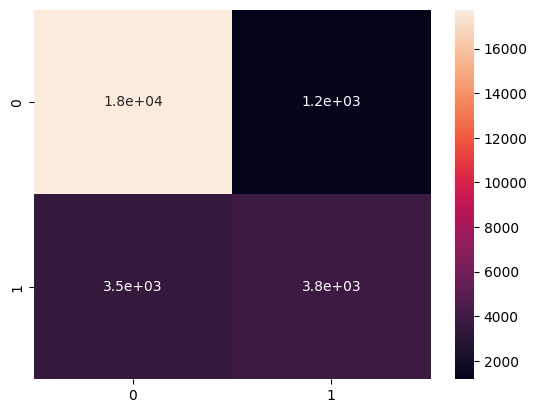

In [32]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
sns.heatmap(conf, annot=True)
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.9133325690702739
Confusion Matrix : 
[[17820  1091]
 [ 1177  6081]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     18911
           1       0.85      0.84      0.84      7258

    accuracy                           0.91     26169
   macro avg       0.89      0.89      0.89     26169
weighted avg       0.91      0.91      0.91     26169



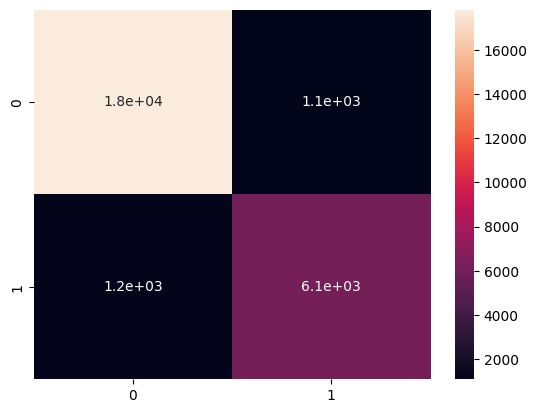

In [33]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
sns.heatmap(conf, annot=True)
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9204402155221827
Confusion Matrix : 
[[18654   257]
 [ 1825  5433]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     18911
           1       0.95      0.75      0.84      7258

    accuracy                           0.92     26169
   macro avg       0.93      0.87      0.89     26169
weighted avg       0.92      0.92      0.92     26169



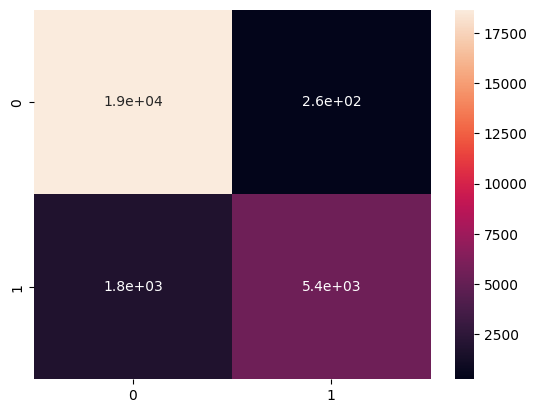

In [34]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
sns.heatmap(conf, annot=True)
print(f"Classification Report : \n{clf_report}")

# Perbandingan Algoritma

In [35]:
#Random Forest

test_score = accuracy_score(y_test, rd_clf.predict(X_test)) * 100 
train_score = accuracy_score(y_train, rd_clf.predict(X_train)) * 100
test_recall = recall_score(y_test, rd_clf.predict(X_test)) * 100
train_recall = recall_score(y_train, rd_clf.predict(X_train)) * 100

results_Potability = pd.DataFrame(data=[["Random Forest", train_score, train_recall, test_score, test_recall]], 
                              columns=['Model', 'Training Accuracy %', 'Training Recall', 'Testing Accuracy %', 'Testing Recall'])


#Decision Tree
test_score = accuracy_score(y_test, dtc.predict(X_test)) * 100 
train_score = accuracy_score(y_train, dtc.predict(X_train)) * 100
test_recall = recall_score(y_test, dtc.predict(X_test)) * 100
train_recall = recall_score(y_train, dtc.predict(X_train)) * 100

results_Potability1 = pd.DataFrame(data=[["Decision Tree", train_score, train_recall, test_score, test_recall]], 
                               columns=['Model', 'Training Accuracy %', 'Training Recall', 'Testing Accuracy %', 'Testing Recall'])

#KNN
test_score = accuracy_score(y_test, knn.predict(X_test)) * 100 
train_score = accuracy_score(y_train, knn.predict(X_train)) * 100
test_recall = recall_score(y_test, knn.predict(X_test)) * 100
train_recall = recall_score(y_train, knn.predict(X_train)) * 100

results_Potability2 = pd.DataFrame(data=[["KNN", train_score, train_recall, test_score, test_recall]], 
                               columns=['Model', 'Training Accuracy %', 'Training Recall', 'Testing Accuracy %', 'Testing Recall'])


results_Potability = results_Potability.append(results_Potability1, ignore_index=True)
results_Potability = results_Potability.append(results_Potability2, ignore_index=True)

#show
results_Potability

,Model,Training Accuracy %,Training Recall,Testing Accuracy %,Testing Recall
0,Random Forest,99.990174,99.970151,92.044022,74.855332
1,Decision Tree,99.993449,99.976121,91.333257,83.783411
2,KNN,88.237992,65.602054,82.234705,52.039129


Berdasarkan tabel perbandingan antara beberapa algoritma, didapati bahwa algoritma Random Forest yang memiliki akurasi tertinggi dalam penelitian ini. Namun, jika dilihat nilai Recall dari seluruh algoritma tersebut, algoritma Decision Tree adalah algoritma yang memiliki nilai recall tertinggi. Berdasarkan penelitian ini yang utama diteliti adalah untuk memprediksi booking yang akan dicancel, maka dari itu nilai recall menjadi pertimbangan utama dalam memilih algoritma.